In [ ]:
#PRCATICAL"B"
#PART A
import pandas as pd

# Load file
df = pd.read_csv('student_performance.csv')

# giving  column names on the given  structure
df.columns = ['hours', 'math_score', 'passed', 'gender', 'rollno', 'english_score']
#justifications: choosing first coloumn as hours because the value 11.4 and 15.6 are seemed to be hours, the gender is choosen on the basis of male and female similar maths and english marks are being choosen, the passed coloumn is based on binary classification yes and no.
# now arranging them the order iven in the question paper
df = df[['rollno', 'gender', 'math_score', 'english_score', 'hours', 'passed']]
# display
print(df.head())


   rollno  gender  math_score  english_score  hours passed
0       2  Female          65             49   11.4    Yes
1       3    Male          83             77    6.4    Yes
2       4    Male          73             63   12.0    Yes
3       5    Male          49             70    7.1    Yes
4       6  Female          75             47   12.4    Yes


In [ ]:
#part B
# Creating efficiency column using the given formula
df['efficiency'] = (df['math_score'] + df['english_score']) / df['hours']
print(df.head())

#  Q1 and Q3 for efficiency
Q1 = df['efficiency'].quantile(0.25)
Q3 = df['efficiency'].quantile(0.75)
IQR = Q3 - Q1

# boundary values using formula
lb = Q1 - 1.5 * IQR
ub = Q3 + 1.5 * IQR

# coloumns having no outliers
df_no_outliers = df[(df['efficiency'] >= lb) & (df['efficiency'] <= ub)]

rows_removed = df.shape[0] - df_no_outliers.shape[0]
print("Number of rows removed:", rows_removed)






   rollno  gender  math_score  english_score  hours passed  efficiency
0       2  Female          65             49   11.4    Yes   10.000000
1       3    Male          83             77    6.4    Yes   25.000000
2       4    Male          73             63   12.0    Yes   11.333333
3       5    Male          49             70    7.1    Yes   16.760563
4       6  Female          75             47   12.4    Yes    9.838710
new DataFrame


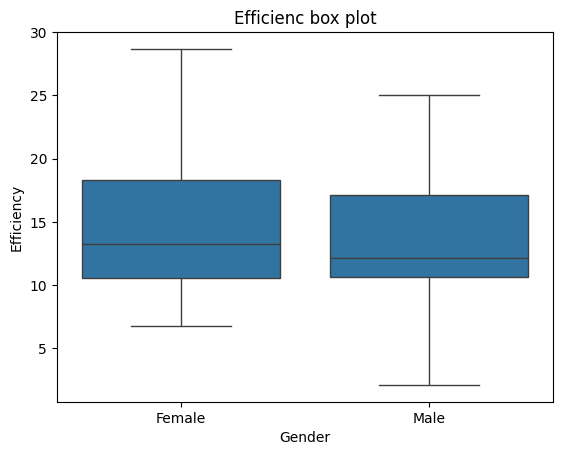

In [ ]:
#part D
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot of efficiency grouped by gender
sns.boxplot(x='gender', y='efficiency', data=df)
plt.title('Efficienc box plot')
plt.xlabel('Gender')
plt.ylabel('Efficiency')
plt.show()


the higher box of female shows the greater variation in the female data then the males data.
since we removed the outliers we got no outliers in the box plot
the line shows the median of both male and female.


In [9]:
#part c
import scipy.stats as stats
df_new=pd.crosstab(df['passed'],df['gender'])
print(df_new)
#Observed Values
Observed_Values = df_new.values
print("Observed Values:",Observed_Values)

chi2, p_value, degrees_of_freedom, expected_values = stats.chi2_contingency(Observed_Values)
print(chi2, p_value, degrees_of_freedom, expected_values)
if p_value < 0.05:
    print(" there is realtionship")
else:
    print("there is no relationship")

gender  Female  Male
passed              
No          14     7
Yes         42    36
Observed Values: [[14  7]
 [42 36]]
0.646569014457304 0.42134202386789776 1 [[11.87878788  9.12121212]
 [44.12121212 33.87878788]]
there is no relationship
